# Importing Libraries

In [82]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

In [83]:
airlines=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")

In [84]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [85]:
airlines.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


In [86]:
airlines.shape

(3999, 12)

In [87]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [88]:
airlines.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler=StandardScaler()

In [91]:
airlines_scale=scaler.fit_transform(airlines)

In [92]:
airlines.columns.astype(str)

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [93]:
column_names=['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?']
airlines_standardized=pd.DataFrame(airlines_scale,columns=column_names)

In [94]:
airlines_standardized.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919


In [95]:
airlines_standardized.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3999.000000,3.999000e+03,3.999000e+03,3.999000e+03
mean,0.000000,2.842882e-17,6.574164e-17,1.705729e-16,3.038330e-16,1.350369e-16,-2.842882e-17,-7.817925e-17,0.000000,1.776801e-17,5.685763e-17,1.421441e-17
std,1.000125,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125,1.000125e+00,1.000125e+00,1.000125e+00
min,-1.735125,-7.304396e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-7.099918e-01,-1.208203e+00,-0.328603,-3.621679e-01,-1.993611e+00,-7.669193e-01
25%,-0.865331,-5.465676e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-6.582276e-01,-8.957878e-01,-0.328603,-3.621679e-01,-8.661823e-01,-7.669193e-01
50%,0.001017,-3.027332e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-4.130308e-01,4.145743e-02,-0.328603,-3.621679e-01,-1.092530e-02,-7.669193e-01
75%,0.866503,1.866028e-01,-1.862987e-01,6.831212e-01,-9.824189e-02,-6.276658e-02,2.756198e-01,5.621492e-01,-0.106466,-9.850333e-02,8.097050e-01,1.303918e+00
max,1.728543,1.618884e+01,1.422486e+01,2.135821e+00,1.344898e+01,2.042732e+01,1.020957e+01,7.747696e+00,21.683004,1.361205e+01,2.023095e+00,1.303918e+00


In [96]:
airlines_standardized.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


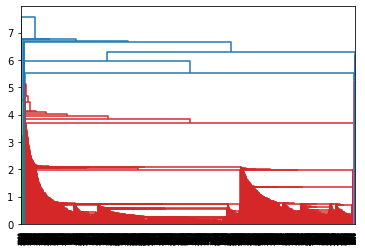

In [97]:
dendrogram= sch.dendrogram(sch.linkage(airlines_standardized, method="single"))

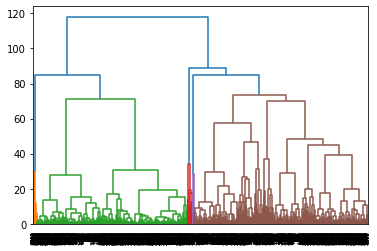

In [98]:
dendrogram= sch.dendrogram(sch.linkage(airlines_standardized, method="ward"))

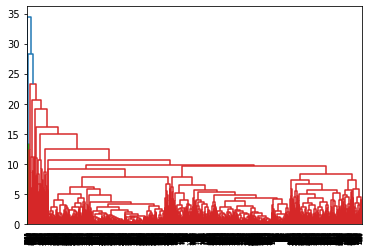

In [99]:
dendrogram= sch.dendrogram(sch.linkage(airlines_standardized, method="complete"))

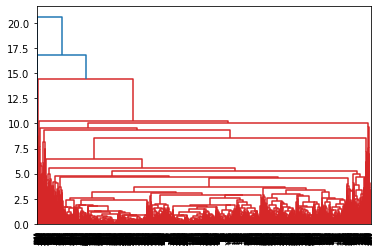

In [100]:
dendrogram= sch.dendrogram(sch.linkage(airlines_standardized, method="average"))

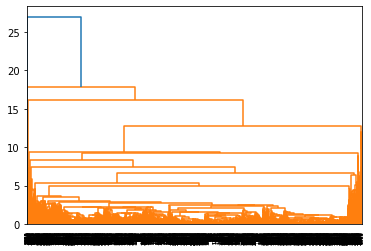

In [101]:
dendrogram= sch.dendrogram(sch.linkage(airlines_standardized, method="centroid"))

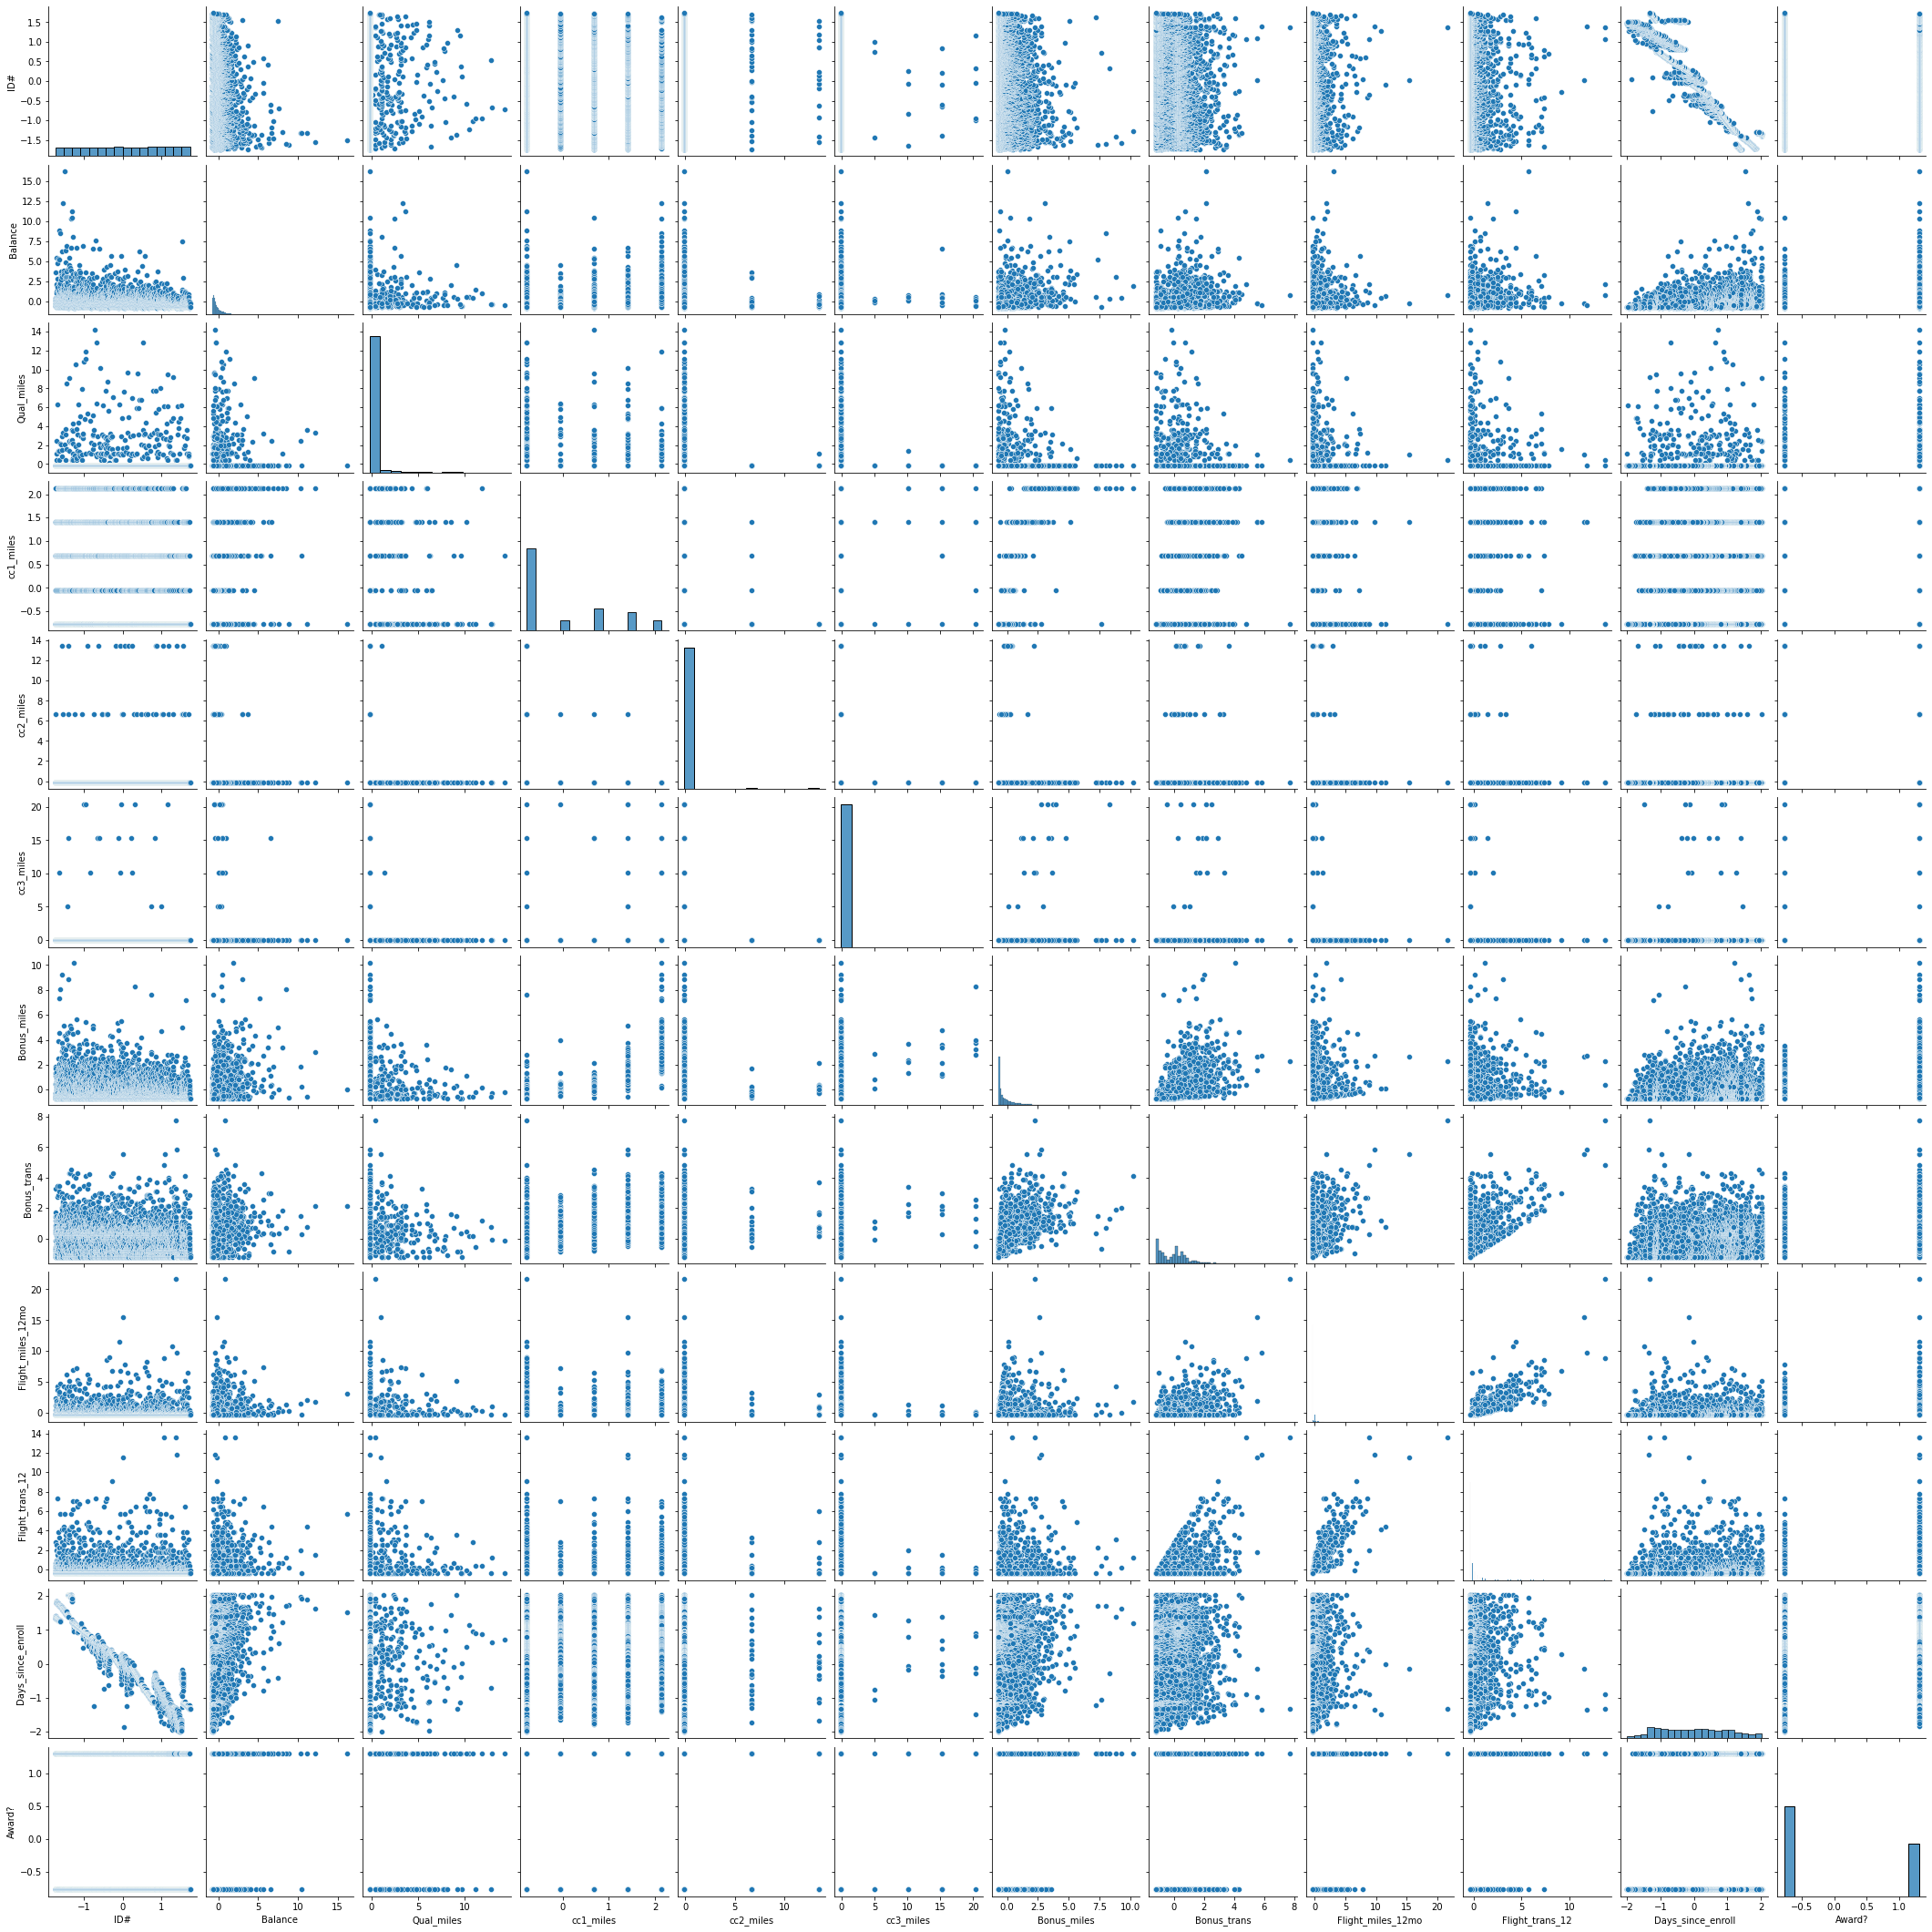

In [102]:
sn.pairplot(airlines_standardized)

In [103]:
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'ward')
# with ward linkage we got good cluster ditribution compared to others so going for ward linkage

In [104]:
y_hc=hc.fit_predict(airlines_standardized)

<AxesSubplot:xlabel='Cluster ID'>

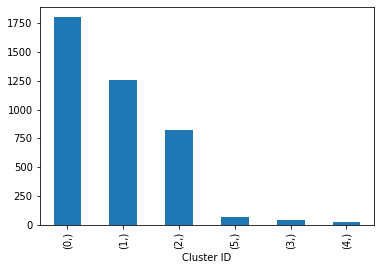

In [105]:
clusters=pd.DataFrame(y_hc, columns=["Cluster ID"])
clusters.value_counts().plot.bar()

In [106]:
clusters.value_counts()

Cluster ID
0             1800
1             1253
2              822
5               63
3               43
4               18
dtype: int64

In [107]:
airlines_standardized["Cluster_ID"]=clusters

In [108]:
airlines_standardized.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0


In [109]:
airlines_standardized["Cluster_ID"].value_counts()

0    1800
1    1253
2     822
5      63
3      43
4      18
Name: Cluster_ID, dtype: int64

In [110]:
airlines_standardized[airlines_standardized["Cluster_ID"]==4].head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
106,-1.642071,0.228513,1.341688,-0.769578,-0.098242,10.182276,1.321609,1.499394,1.314214,2.010813,1.268570,1.303918,4
343,-1.436147,0.386051,-0.186299,-0.769578,-0.098242,5.059755,0.082622,-0.062681,-0.328603,-0.362168,1.444368,-0.766919,4
384,-1.400821,-0.450645,-0.186299,2.135821,-0.098242,15.304798,3.574265,2.124225,-0.328603,-0.362168,1.385769,1.303918,4
850,-0.994141,-0.476090,-0.186299,1.409471,-0.098242,20.427319,3.733781,2.540778,0.099958,0.165161,0.894698,1.303918,4
904,-0.947614,-0.573289,-0.186299,-0.043229,-0.098242,20.427319,3.935165,0.458011,-0.328603,-0.362168,0.826413,1.303918,4


In [111]:
airlines_standardized[airlines_standardized["Cluster_ID"]==5].head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
65,-1.679120,-0.195382,-0.186299,0.683121,-0.098242,-0.062767,0.688346,3.478023,3.635586,7.284104,1.311188,1.303918,5
135,-1.617085,1.844750,2.109559,-0.769578,-0.098242,-0.062767,0.083947,1.499394,4.794129,5.702117,1.261306,1.303918,5
238,-1.527477,-0.423164,-0.186299,2.135821,-0.098242,-0.062767,3.335197,2.644916,4.242714,4.383794,1.569799,1.303918,5
323,-1.454240,2.035723,-0.186299,-0.769578,-0.098242,-0.062767,0.187227,0.770426,6.218380,3.856465,1.470519,1.303918,5
327,-1.450794,3.124693,-0.186299,2.135821,-0.098242,-0.062767,4.024531,1.499394,4.012720,1.747148,1.474878,1.303918,5


In [112]:
airlines_standardized[airlines_standardized["Cluster_ID"]==3].head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
8,-1.728232,3.666042,-0.186299,0.683121,6.675367,-0.062767,-0.637398,3.269747,2.421330,2.801807,1.370271,1.303918,3
198,-1.561942,-0.644406,-0.186299,-0.769578,13.448976,-0.062767,-0.238026,0.458011,-0.328603,-0.362168,1.630820,1.303918,3
226,-1.537817,0.433965,-0.186299,-0.769578,6.675367,-0.062767,-0.442971,-0.062681,-0.328603,-0.362168,1.596919,1.303918,3
381,-1.403406,0.933563,-0.186299,-0.769578,13.448976,-0.062767,-0.051261,0.145596,-0.328603,-0.362168,1.392549,-0.766919,3
392,-1.393066,-0.619397,-0.186299,-0.769578,6.675367,-0.062767,-0.335467,0.874564,-0.328603,-0.362168,2.023095,1.303918,3


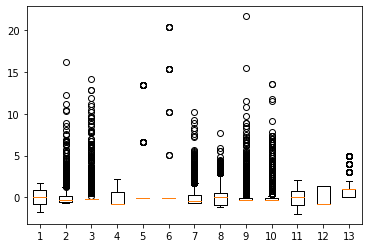

In [113]:
plt.boxplot(airlines_standardized);

In [114]:
airlines_standardized.shape

(3999, 13)

In [115]:
airlines_standardized.iloc[:,:-1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [116]:
arilines_new=scaler.inverse_transform(airlines_standardized.iloc[:,:-1])

In [117]:
airlines_new=pd.DataFrame(arilines_new, columns=column_names)
airlines_new["Cluster_ID"]=clusters

In [118]:
airlines_new.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
0,1.0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0
1,2.0,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0
2,3.0,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,0
3,4.0,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,0
4,5.0,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0,1


In [119]:
airlines_new["Cluster_ID"].value_counts()

0    1800
1    1253
2     822
5      63
3      43
4      18
Name: Cluster_ID, dtype: int64

In [120]:
airlines_new.groupby(["Cluster_ID"]).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster_ID,,,,,,,,,,,,
0,2388.934444,38220.721111,9.431667,1.183889,1.000000,1.000000,3770.797222,6.238333,113.728333,0.383889,3429.802778,0.000000
1,1920.790902,65957.688747,398.295291,2.264964,1.000000,1.000000,18383.464485,12.927374,605.266560,1.708699,4307.981644,0.916201
2,1351.638686,155114.811436,26.709246,3.648418,1.000000,1.000000,41197.543796,18.968370,402.234793,1.372263,5306.440389,0.306569
3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,1742.444444,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000
5,1752.952381,160067.206349,573.587302,2.507937,1.000000,1.000000,42723.841270,34.142857,8148.619048,22.444444,4527.253968,0.873016


# K Means

In [121]:
from sklearn.cluster import KMeans

In [122]:
airlines.shape

(3999, 12)

In [123]:
airlines_scaled=airlines_standardized.iloc[:,:-1]
airlines_scaled.shape

(3999, 12)

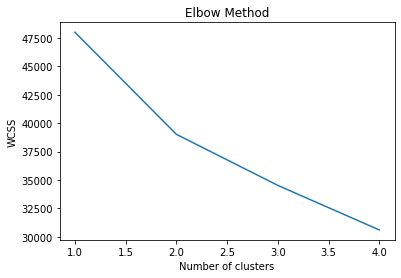

In [124]:
# WCSS stands for within Cluster sum of Squared. WCSS is vairable name
wcss=[]
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airlines_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 5), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [125]:
from sklearn.cluster import KMeans
clusters_new = KMeans(2, random_state=42)
clusters_new.fit(airlines_scaled)

KMeans(n_clusters=2, random_state=42)

In [126]:
clusters_new.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [127]:
airlines_scaled["K Means_Cluster"]=clusters_new.labels_

In [128]:
airlines_scaled.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K Means_Cluster
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,1
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,1
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,1
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,1
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0


In [129]:
airlines_scaled["K Means_Cluster"].value_counts()

1    2674
0    1325
Name: K Means_Cluster, dtype: int64

In [130]:
airlines_new["K Means_Cluster"]=clusters_new.labels_

In [131]:
airlines_knew=airlines_new.iloc[:,:-1]

In [132]:
airlines_knew.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
0,1.0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0
1,2.0,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0
2,3.0,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,0
3,4.0,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,0
4,5.0,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0,1


In [133]:
airlines_knew["K Means_cluster"]=clusters_new.labels_

In [134]:
# K Means Method
airlines_knew.groupby(["K Means_cluster"]).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
K Means_cluster,,,,,,,,,,,,,
0,1410.578868,134006.000755,265.764528,3.532830,1.009811,1.033962,40444.885283,19.985660,968.664151,2.88000,5210.200000,0.694340,1.696604
1,2314.228123,43670.066567,83.835453,1.329469,1.016829,1.001496,5599.389304,7.447644,208.034031,0.62715,3577.637996,0.209798,0.435677


In [135]:
# HIerarchical clustering method 
airlines_new.groupby(["Cluster_ID"]).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K Means_Cluster
Cluster_ID,,,,,,,,,,,,,
0,2388.934444,38220.721111,9.431667,1.183889,1.000000,1.000000,3770.797222,6.238333,113.728333,0.383889,3429.802778,0.000000,0.998333
1,1920.790902,65957.688747,398.295291,2.264964,1.000000,1.000000,18383.464485,12.927374,605.266560,1.708699,4307.981644,0.916201,0.500399
2,1351.638686,155114.811436,26.709246,3.648418,1.000000,1.000000,41197.543796,18.968370,402.234793,1.372263,5306.440389,0.306569,0.260341
3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,0.790698
4,1742.444444,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000,0.111111
5,1752.952381,160067.206349,573.587302,2.507937,1.000000,1.000000,42723.841270,34.142857,8148.619048,22.444444,4527.253968,0.873016,0.000000


In [136]:
# In both the cluster method we have some similarities

# DBSCAN

In [137]:
from sklearn.cluster import DBSCAN

In [138]:
airlines.drop(["ID#"], axis=1, inplace=True)

In [139]:
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [140]:
scaler1=StandardScaler()

In [141]:
airlines1=scaler1.fit_transform(airlines)

In [142]:
airlines.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [143]:
airlines1=pd.DataFrame(airlines1, columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'])

In [144]:
airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [145]:
dbscan = DBSCAN(eps=1, min_samples=6)
dbscan.fit(airlines1)

DBSCAN(eps=1, min_samples=6)

In [146]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [147]:
cl=pd.DataFrame(dbscan.labels_, columns=["Cl name"])

In [148]:
airlines1=scaler1.inverse_transform(airlines1)

In [155]:
airlines1=pd.DataFrame(airlines1, columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'])

In [156]:
airlines1["CL name"]=cl

In [158]:
airlines1.groupby(["CL name"]).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
CL name,,,,,,,,,,,
-1,181742.540070,931.761324,2.724739,1.057491,1.085366,39466.153310,22.055749,2172.263066,6.273519,4742.745645,0.688153
0,53181.803548,3.660320,1.655993,1.000000,1.000000,9010.212462,8.451752,125.327131,0.401558,3796.382518,0.000000
1,60939.351750,9.894107,2.593923,1.000000,1.000000,22898.413444,12.820442,278.409761,0.882136,4505.348066,1.000000
2,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000
3,38616.166667,0.000000,1.000000,3.000000,1.000000,14966.833333,14.000000,41.666667,0.166667,3835.666667,0.000000
4,27113.888889,2475.444444,1.000000,1.000000,1.000000,2169.111111,4.555556,44.444444,0.333333,1900.111111,0.000000


In [159]:
airlines1.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,CL name
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0,1
5,16420.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6942.0,0.0,0
6,84914.0,0.0,3.0,1.0,1.0,27482.0,25.0,0.0,0.0,6994.0,0.0,0
7,20856.0,0.0,1.0,1.0,1.0,5250.0,4.0,250.0,1.0,6938.0,1.0,1
8,443003.0,0.0,3.0,2.0,1.0,1753.0,43.0,3850.0,12.0,6948.0,1.0,-1
9,104860.0,0.0,3.0,1.0,1.0,28426.0,28.0,1150.0,3.0,6931.0,1.0,1
